# ¿ Que temperatura máxima, media y mínima hay en Tomelloso en la provincia de Ciudad Real?

## Donde están los datos de la estación

In [ ]:
%pwd

In [ ]:
import pandas as pd
import os

In [ ]:
estaciones = pd.read_excel('ListadoEstaciones-20190206.xlsx',header=None)
id=estaciones[(estaciones[2]=='TOMELLOSO')&(estaciones[3]=='CIUDAD REAL')][0].values
lista_nombre=os.listdir(os.curdir+'/DatosPorEstacion')
for nombre in lista_nombre:
  clave = nombre.split('-')[0]
  if clave == id:
    file = nombre
    break
print(nombre)

### Lo hacemos función

In [ ]:
def fichero (provincia:str,estacion:str):
  prefijo_dir=os.curdir+'/DatosPorEstacion/'
  estaciones = pd.read_excel('ListadoEstaciones-20190206.xlsx',header=None)
  id=estaciones[(estaciones[2]==estacion)&(estaciones[3]==provincia)][0].values
  lista_nombre=os.listdir(prefijo_dir)
  for nombre in lista_nombre:
    clave = nombre.split('-')[0]
    if clave == id:
      break
  return prefijo_dir+nombre

In [ ]:
fichero('CIUDAD REAL','TOMELLOSO')

### Si queremos todas las estaciones de una provincia

In [ ]:
def ficheroLista (provincia:str):
  prefijo_dir=os.curdir+'/DatosPorEstacion/'
  estaciones = pd.read_excel('ListadoEstaciones-20190206.xlsx',header=None)
  id=estaciones[(estaciones[3]==provincia)][0].values
  lista_nombre=os.listdir(prefijo_dir)
  lista_resultado=[]
  for nombre in lista_nombre:
    clave = nombre.split('-')[0]
    if clave in id:
      lista_resultado.append(prefijo_dir+nombre)
  return lista_resultado

In [ ]:
ficheroLista('CIUDAD REAL')

## Leemos los datos

In [ ]:
provincia = 'Ciudad Real'.upper()
estacion = 'Tomelloso'.upper()
nombre_fichero=fichero(provincia,estacion)
nombre_fichero

In [ ]:
df = pd.read_csv(nombre_fichero,sep=';',encoding = "ISO-8859-1",parse_dates=["FECHA"],index_col="FECHA")

## Construimos los **índices jerárquicos** (año,mes,dia)

In [ ]:
index_years=pd.MultiIndex.from_tuples(list(zip(df.index.year,df.index.month,df.index.day)),names=['year','month','day'])

In [ ]:
df=df.set_index(index_years)

## Preparar la información
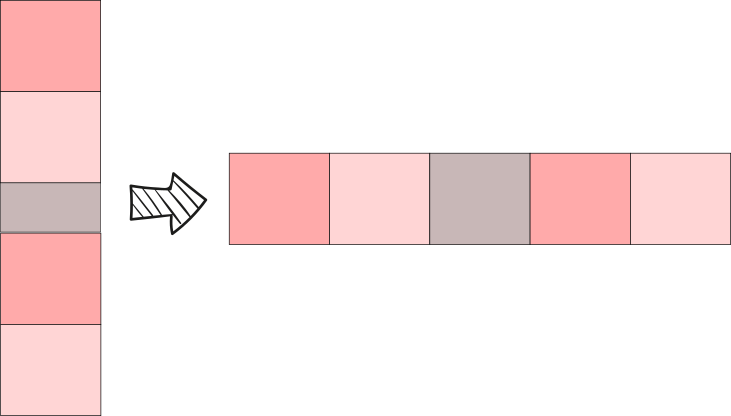


In [ ]:
years=index_years.levels[0]
d0=pd.DataFrame()
d0[years[0]]=df.loc[years[0]]['TMAX']
for year in years[1:]:
  d1=pd.DataFrame()
  d1[year]=df.loc[year]['TMAX']
  d0=d0.join(d1,how='outer')
  d0=d0.drop_duplicates()

## Queremos tener todos los días como las columnas

In [ ]:
d=d0.transpose()
d.describe()

## Pintemos la información

In [ ]:
d.describe().loc[['min','mean','50%','max']].transpose().plot(title=f"{df.iloc[0]['PROVINCIA']}-{df.iloc[0]['NOMBRE']}",figsize=(50,10))

In [ ]:
ax=df.loc[:,:,:]['TMAX'].plot(figsize=(50,10))

In [ ]:
df.loc[:,:,:]['TMIN'].plot(figsize=(50,10))

# Trabajar con varias tablas

In [ ]:
lf=ficheroLista('CIUDAD REAL')

In [ ]:
ldf=[pd.read_csv(file,sep=';',encoding = "ISO-8859-1",parse_dates=["FECHA"]) for file in lf]

In [ ]:
df_cr=pd.concat(ldf)

In [ ]:
df_cr['MONTH']=df_cr['FECHA'].dt.month
df_cr['DAY']=df_cr['FECHA'].dt.day
df_cr['YEAR']=df_cr['FECHA'].dt.year

In [ ]:
datos = df_cr.groupby(['MONTH','DAY']).median()

In [ ]:
datos[['TMIN','TMEDIA','TMAX']].plot(figsize=(10,7),title='CIUDAD REAL')